In [24]:
import pandas as pd
import seaborn as sns
import numpy as np

In [25]:
data = pd.read_csv('data/creditcard.csv')

In [26]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [27]:
fraud = data.loc[data['Class']== 1]
normal = data.loc[data['Class']== 0]

In [28]:
len(fraud)

492

In [29]:
len(normal)

284315

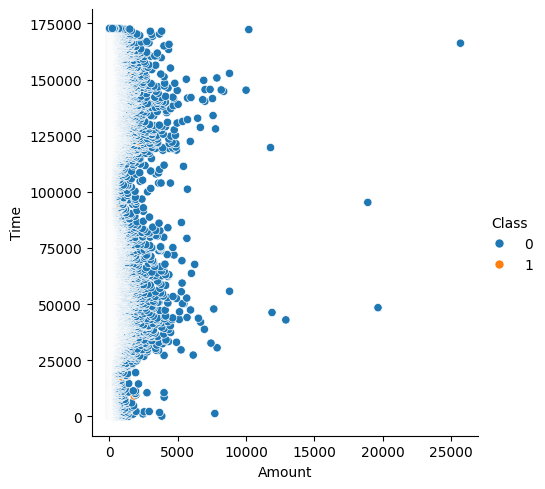

In [30]:
sns.relplot(x = 'Amount', y = 'Time', hue = "Class", data = data)

In [31]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [32]:
X = data.iloc[:,:-1]
y = data['Class']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30)

In [34]:
clf = linear_model.LogisticRegression(C=1e5)

In [35]:
clf.fit(X_train, y_train)

c:\Users\Home\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100000.0)

In [36]:
y_pred = np.array(clf.predict(X_test))
y_test = np.array(y_test)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [39]:
print(confusion_matrix(y_test, y_pred))

[[85266    38]
 [   58    81]]


In [ ]:
print(accuracy_score(y_test, y_pred))

0.9986423697669792


In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85304
           1       0.68      0.58      0.63       139

    accuracy                           1.00     85443
   macro avg       0.84      0.79      0.81     85443
weighted avg       1.00      1.00      1.00     85443

